First few rows of the dataset:
       textID                                               text sentiment  \
0  f87dea47db  Last session of the day  http://twitpic.com/67ezh   neutral   
1  96d74cb729   Shanghai is also really exciting (precisely -...  positive   
2  eee518ae67  Recession hit Veronique Branquinho, she has to...  negative   
3  01082688c6                                        happy bday!  positive   
4  33987a8ee5             http://twitpic.com/4w75p - I like it!!  positive   

  Time of Tweet Age of User      Country  Population -2020  Land Area (Km²)  \
0       morning        0-20  Afghanistan          38928346         652860.0   
1          noon       21-30      Albania           2877797          27400.0   
2         night       31-45      Algeria          43851044        2381740.0   
3       morning       46-60      Andorra             77265            470.0   
4          noon       60-70       Angola          32866272        1246700.0   

   Density (P/Km²)  
0   

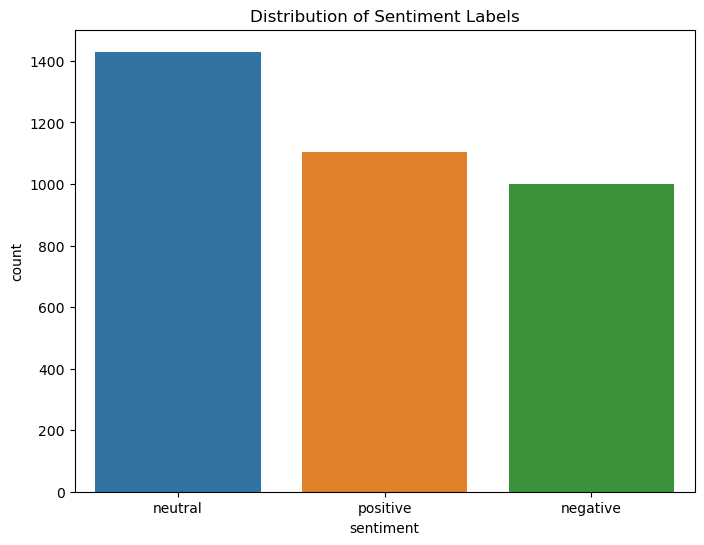

In [4]:
import pandas as pd

# Load the dataset into a pandas DataFrame
# Replace 'your_dataset.csv' with the actual file path or URL of your dataset
dataset_path = 'test (1).csv'
df = pd.read_csv(dataset_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Get information about the dataset, including data types and null values
print("\nDataset information:")
print(df.info())

# Summary statistics of numerical columns
print("\nSummary statistics of numerical columns:")
print(df.describe())

# Unique values in the 'sentiment' column
print("\nUnique values in the 'sentiment' column:")
print(df['sentiment'].unique())

# Check for missing values in the dataset
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Visualize the distribution of sentiment labels
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiment Labels')
plt.show()


In [6]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load the dataset into a pandas DataFrame
# Replace 'your_dataset.csv' with the actual file path or URL of your dataset
dataset_path = 'test (1).csv'
df = pd.read_csv(dataset_path)

# Define function for text preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters and punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join the tokens back into a single string
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

# Apply text preprocessing to the 'text' column in the DataFrame
df['preprocessed_text'] = df['text'].apply(preprocess_text)

# Display the preprocessed text
print("Preprocessed Text:")
print(df['preprocessed_text'].head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Anushree\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anushree\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Anushree\AppData\Roaming\nltk_data...


Preprocessed Text:
0                 last session day httptwitpiccom67ezh
1    shanghai also really exciting precisely skyscr...
2    recession hit veronique branquinho quit compan...
3                                           happy bday
4                             httptwitpiccom4w75p like
Name: preprocessed_text, dtype: object


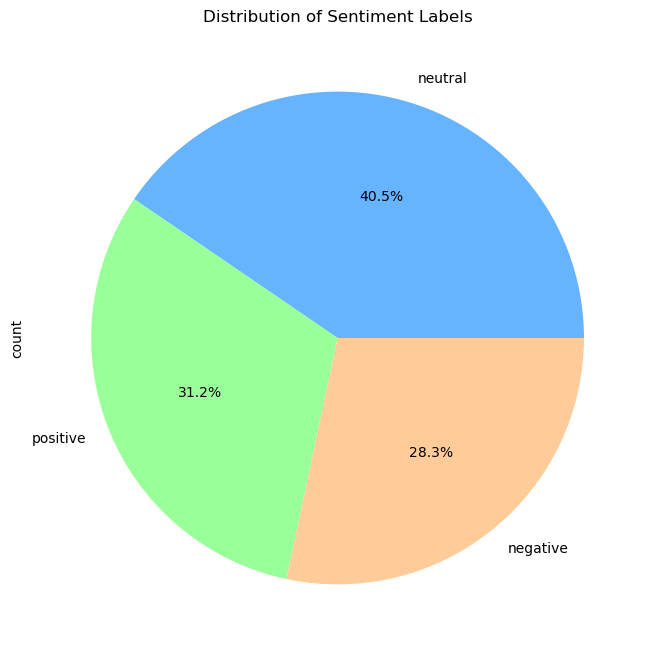

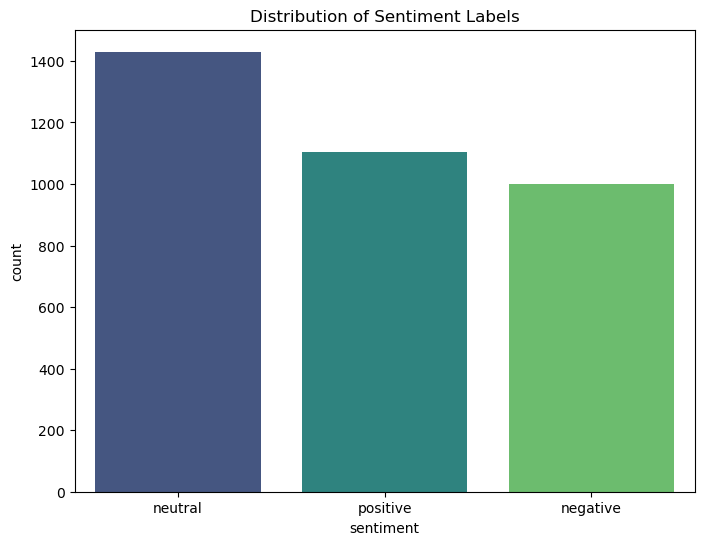

In [7]:
# Visualize the distribution of sentiment labels using a pie chart
plt.figure(figsize=(8, 8))
df['sentiment'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Distribution of Sentiment Labels')
plt.show()

# Visualize the distribution of sentiment labels using a bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title('Distribution of Sentiment Labels')
plt.show()


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming you have a 'preprocessed_text' column in your DataFrame
corpus = df['preprocessed_text'].tolist()

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))

# Fit and transform the corpus
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

# Convert the TF-IDF matrix to a DataFrame (optional)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the TF-IDF matrix (optional)
print("TF-IDF Matrix:")
print(tfidf_df.head())



TF-IDF Matrix:
    09   10  10 minute  100  1030   11  1111   12  120  1215  ...  youve  \
0  0.0  0.0        0.0  0.0   0.0  0.0   0.0  0.0  0.0   0.0  ...    0.0   
1  0.0  0.0        0.0  0.0   0.0  0.0   0.0  0.0  0.0   0.0  ...    0.0   
2  0.0  0.0        0.0  0.0   0.0  0.0   0.0  0.0  0.0   0.0  ...    0.0   
3  0.0  0.0        0.0  0.0   0.0  0.0   0.0  0.0  0.0   0.0  ...    0.0   
4  0.0  0.0        0.0  0.0   0.0  0.0   0.0  0.0  0.0   0.0  ...    0.0   

   youve got   yr  yum  yummy  yup  zack  zoo   â½  â½s  
0        0.0  0.0  0.0    0.0  0.0   0.0  0.0  0.0  0.0  
1        0.0  0.0  0.0    0.0  0.0   0.0  0.0  0.0  0.0  
2        0.0  0.0  0.0    0.0  0.0   0.0  0.0  0.0  0.0  
3        0.0  0.0  0.0    0.0  0.0   0.0  0.0  0.0  0.0  
4        0.0  0.0  0.0    0.0  0.0   0.0  0.0  0.0  0.0  

[5 rows x 5000 columns]


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the preprocessed dataset
# Replace 'your_dataset.csv' with the actual file path or URL of your dataset
dataset_path = 'test (1).csv'
df = pd.read_csv(dataset_path)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['preprocessed_text'], df['sentiment'], test_size=0.2, random_state=42)

# Label encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Naive Bayes
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_tfidf, y_train_encoded)
y_pred_nb = naive_bayes_model.predict(X_test_tfidf)

# Support Vector Machines
svm_model = make_pipeline(StandardScaler(with_mean=False), SVC(C=1, kernel='linear', gamma='auto'))
svm_model.fit(X_train_tfidf, y_train_encoded)
y_pred_svm = svm_model.predict(X_test_tfidf)

# Deep Learning - LSTM
max_words = 10000
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

X_train_lstm = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=100, padding='post', truncating='post')
X_test_lstm = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=100, padding='post', truncating='post')

lstm_model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=100),
    LSTM(64),
    Dense(3, activation='softmax')
])

lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_model.fit(X_train_lstm, y_train_encoded, epochs=5, validation_data=(X_test_lstm, y_test_encoded), batch_size=32)

# Make predictions with the LSTM model
y_pred_lstm_prob = lstm_model.predict(X_test_lstm)
y_pred_lstm = [np.argmax(pred) for pred in y_pred_lstm_prob]

# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"\nEvaluation results for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

# Naive Bayes evaluation
evaluate_model(y_test_encoded, y_pred_nb, 'Naive Bayes')

# SVM evaluation
evaluate_model(y_test_encoded, y_pred_svm, 'Support Vector Machines')

# LSTM evaluation
evaluate_model(y_test_encoded, y_pred_lstm, 'LSTM')

# Print classification report for LSTM
print("\nClassification Report for LSTM:")
print(classification_report(y_test_encoded, y_pred_lstm, target_names=label_encoder.classes_))


ModuleNotFoundError: No module named 'tensorflow'

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the preprocessed dataset
# Replace 'your_dataset.csv' with the actual file path or URL of your dataset
dataset_path = 'test (1).csv'
df = pd.read_csv(dataset_path)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['preprocessed_text'], df['sentiment'], test_size=0.2, random_state=42)

# Label encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Naive Bayes
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_tfidf, y_train_encoded)
y_pred_nb = naive_bayes_model.predict(X_test_tfidf)

# Support Vector Machines
svm_model = make_pipeline(StandardScaler(with_mean=False), SVC(C=1, kernel='linear', gamma='auto'))
svm_model.fit(X_train_tfidf, y_train_encoded)
y_pred_svm = svm_model.predict(X_test_tfidf)

# Deep Learning - LSTM
max_words = 10000
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

X_train_lstm = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=100, padding='post', truncating='post')
X_test_lstm = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=100, padding='post', truncating='post')

lstm_model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=100),
    LSTM(64),
    Dense(3, activation='softmax')
])

lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_model.fit(X_train_lstm, y_train_encoded, epochs=5, validation_data=(X_test_lstm, y_test_encoded), batch_size=32)

# Make predictions with the LSTM model
y_pred_lstm_prob = lstm_model.predict(X_test_lstm)
y_pred_lstm = [np.argmax(pred) for pred in y_pred_lstm_prob]

# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"\nEvaluation results for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

# Naive Bayes evaluation
evaluate_model(y_test_encoded, y_pred_nb, 'Naive Bayes')

# SVM evaluation
evaluate_model(y_test_encoded, y_pred_svm, 'Support Vector Machines')

# LSTM evaluation
evaluate_model(y_test_encoded, y_pred_lstm, 'LSTM')

# Print classification report for LSTM
print("\nClassification Report for LSTM:")
print(classification_report(y_test_encoded, y_pred_lstm, target_names=label_encoder.classes_))


ModuleNotFoundError: No module named 'tensorflow'